# GFC Analysis

Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(style="whitegrid")

# Combined Time Series Plots

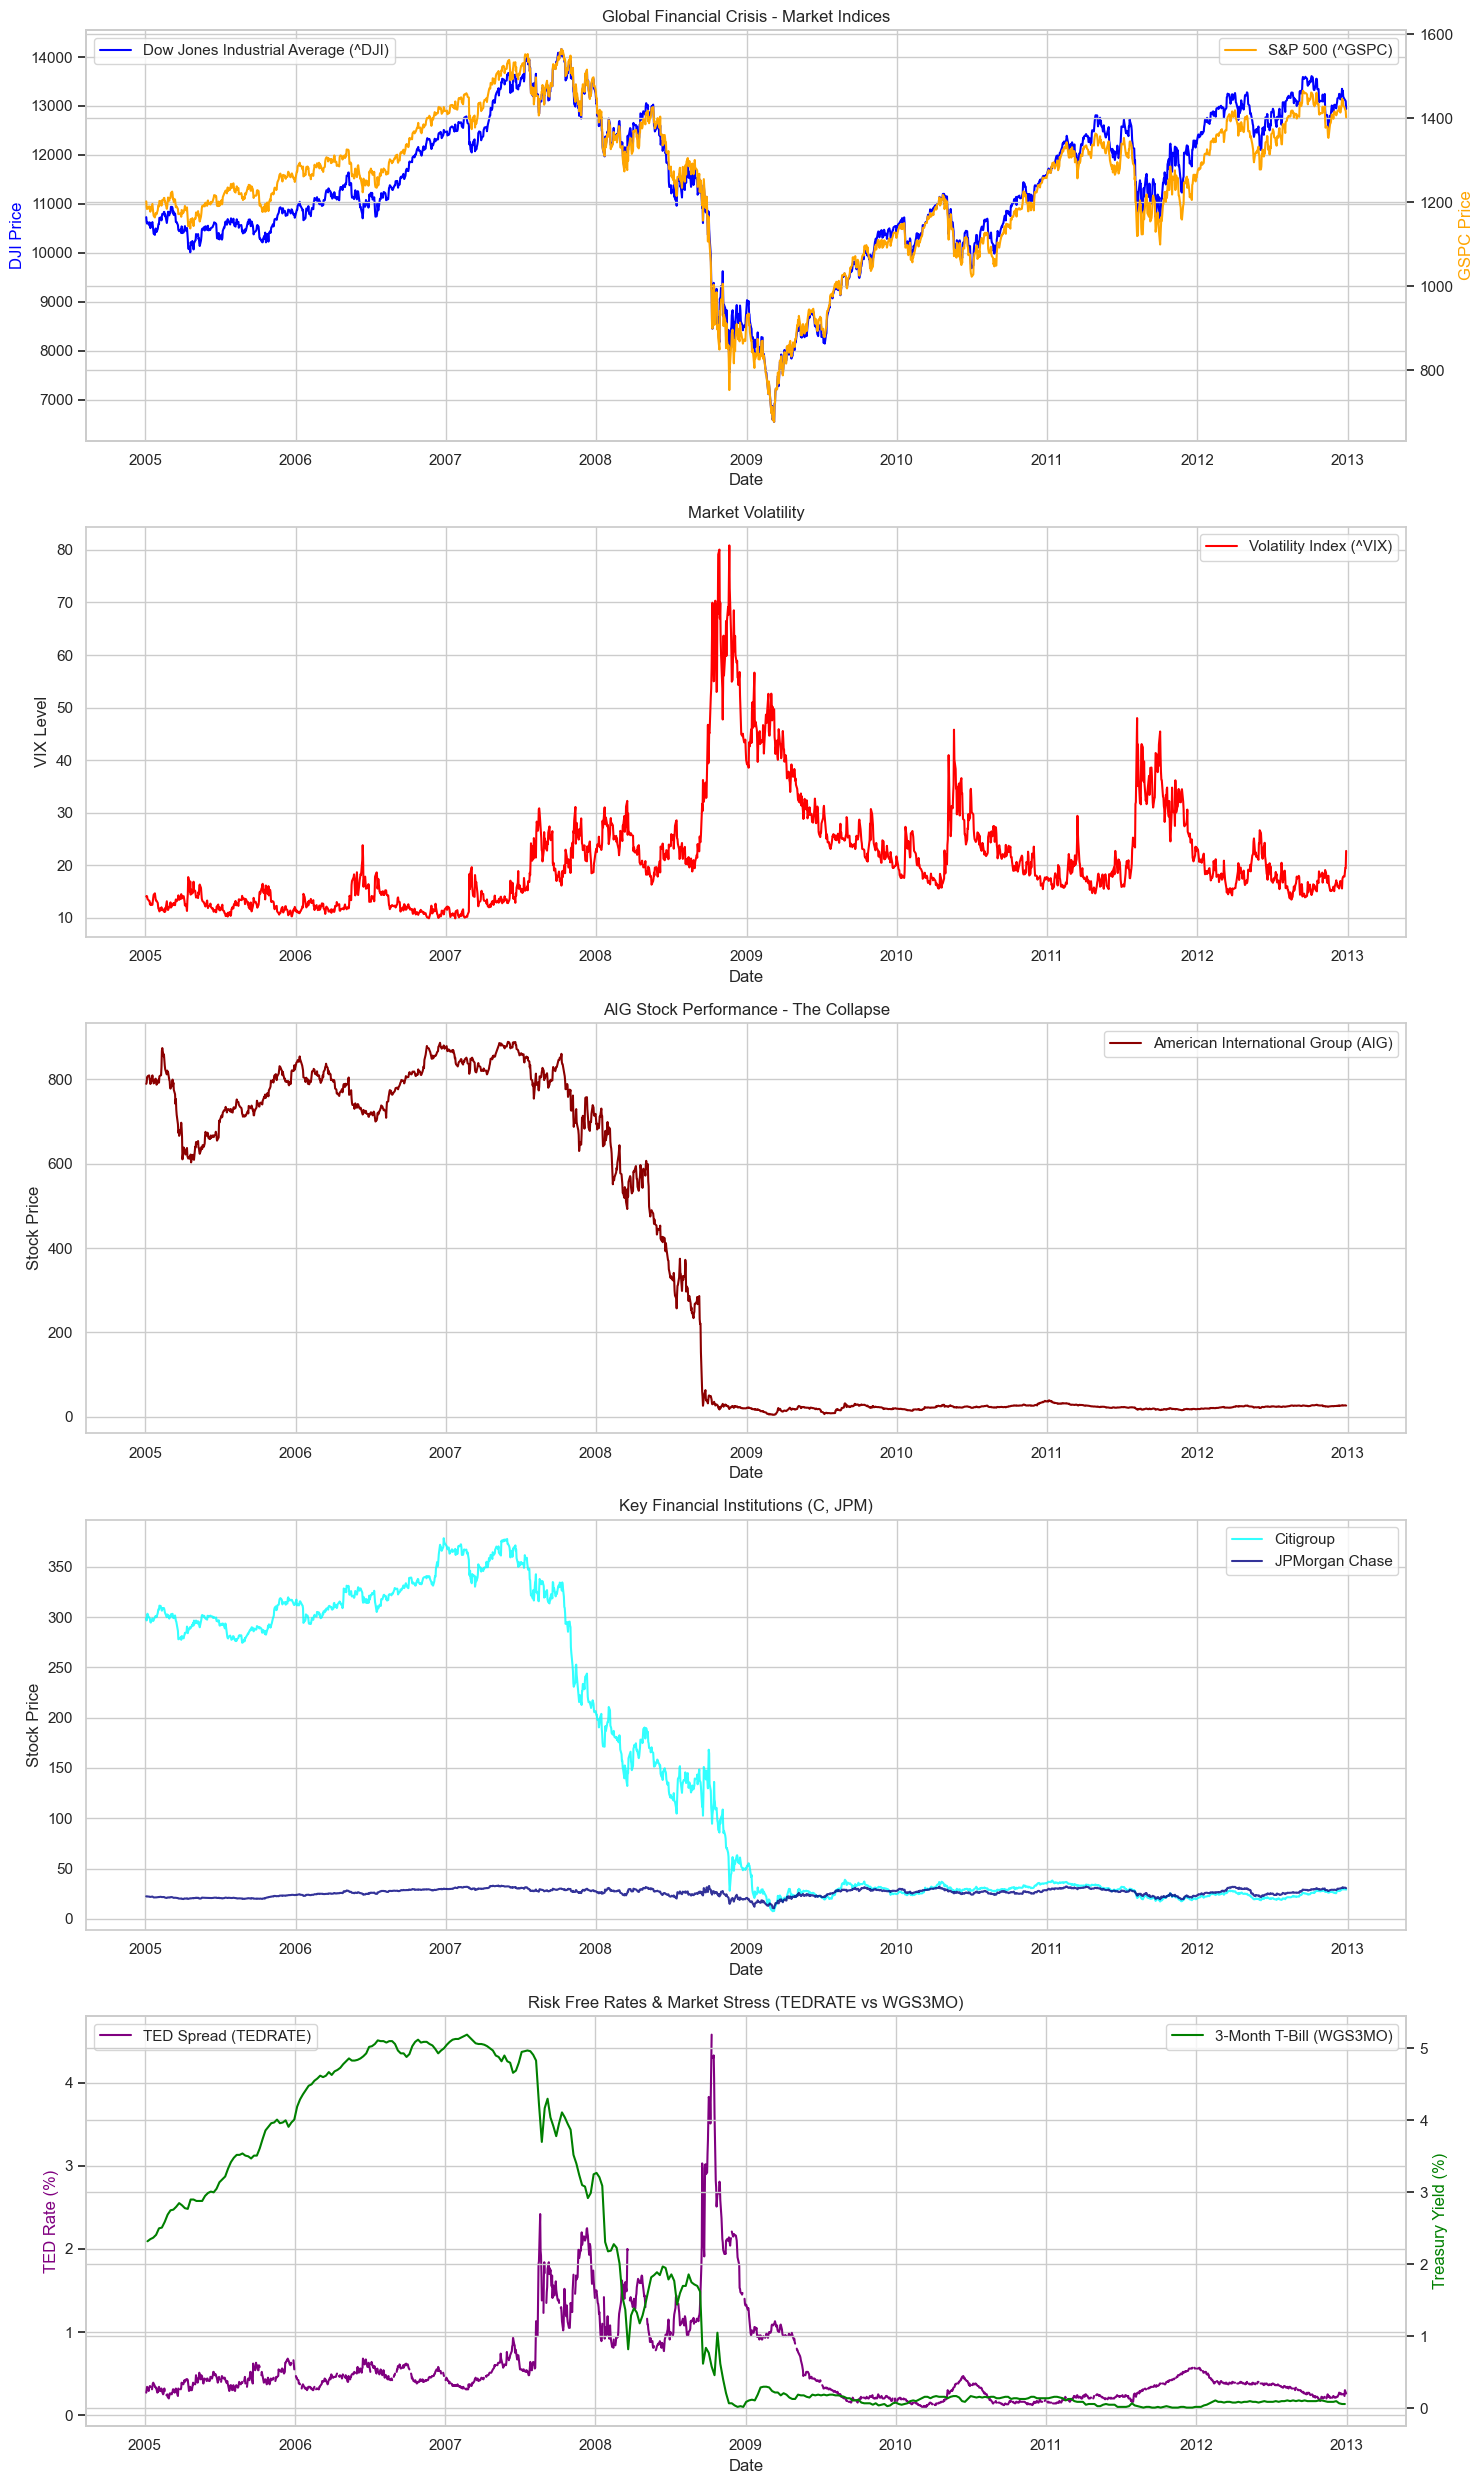

In [5]:
def load_financial_data(filepath, ticker_name):
    # Stock/Index CSVs have 3 header rows. We'll skip them and set names.
    df = pd.read_csv(filepath, skiprows=3, names=['Date', ticker_name, 'High', 'Low', 'Open', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    return df[ticker_name]
# 1. Read all datasets from the 'data' folder
dji = load_financial_data("../data/^DJI.csv", "DJI")
gspc = load_financial_data("../data/^GSPC.csv", "GSPC")
vix = load_financial_data("../data/^VIX.csv", "VIX")
aig = load_financial_data("../data/AIG.csv", "AIG")
c_stock = load_financial_data("../data/C.csv", "Citigroup")
jpm = load_financial_data("../data/JPM.csv", "JPMorgan")
# Read rate data
tedrate = pd.read_csv("../data/TEDRATE.csv", na_values='.')
tedrate['observation_date'] = pd.to_datetime(tedrate['observation_date'])
tedrate = tedrate.set_index('observation_date')
wgs3mo = pd.read_csv("../data/WGS3MO.csv")
wgs3mo['observation_date'] = pd.to_datetime(wgs3mo['observation_date'])
wgs3mo = wgs3mo.set_index('observation_date')
# 2. Create multi-panel plot with 5 subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 25))
# Panel 1: Market Indices (DJI vs GSPC)
axes[0].plot(dji, label='Dow Jones Industrial Average (^DJI)', color='blue')
axes[0].set_ylabel('DJI Price', color='blue')
ax0_twin = axes[0].twinx()
ax0_twin.plot(gspc, label='S&P 500 (^GSPC)', color='orange')
ax0_twin.set_ylabel('GSPC Price', color='orange')
axes[0].set_title('Global Financial Crisis - Market Indices')
axes[0].legend(loc='upper left')
ax0_twin.legend(loc='upper right')
# Panel 2: Volatility (VIX)
axes[1].plot(vix, label='Volatility Index (^VIX)', color='red')
axes[1].set_ylabel('VIX Level')
axes[1].set_title('Market Volatility')
axes[1].legend()
# Panel 3: AIG Stock Performance (Separate Graph)
axes[2].plot(aig, label='American International Group (AIG)', color='darkred')
axes[2].set_ylabel('Stock Price')
axes[2].set_title('AIG Stock Performance - The Collapse')
axes[2].legend()
# Panel 4: Key Financial Institutions (Citigroup and JPMorgan)
axes[3].plot(c_stock, label='Citigroup', alpha=0.8, color='cyan')
axes[3].plot(jpm, label='JPMorgan Chase', alpha=0.8, color='navy')
axes[3].set_ylabel('Stock Price')
axes[3].set_title('Key Financial Institutions (C, JPM)')
axes[3].legend()
# Panel 5: Interest Rates and Spread
axes[4].plot(tedrate, label='TED Spread (TEDRATE)', color='purple')
axes[4].set_ylabel('TED Rate (%)', color='purple')
ax4_twin = axes[4].twinx()
ax4_twin.plot(wgs3mo, label='3-Month T-Bill (WGS3MO)', color='green')
ax4_twin.set_ylabel('Treasury Yield (%)', color='green')
axes[4].set_title('Risk Free Rates & Market Stress (TEDRATE vs WGS3MO)')
axes[4].legend(loc='upper left')
ax4_twin.legend(loc='upper right')
# Explicitly ensure every chart has its own x-axis label shown
for ax in axes:
    ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

### Trade Volume Analysis

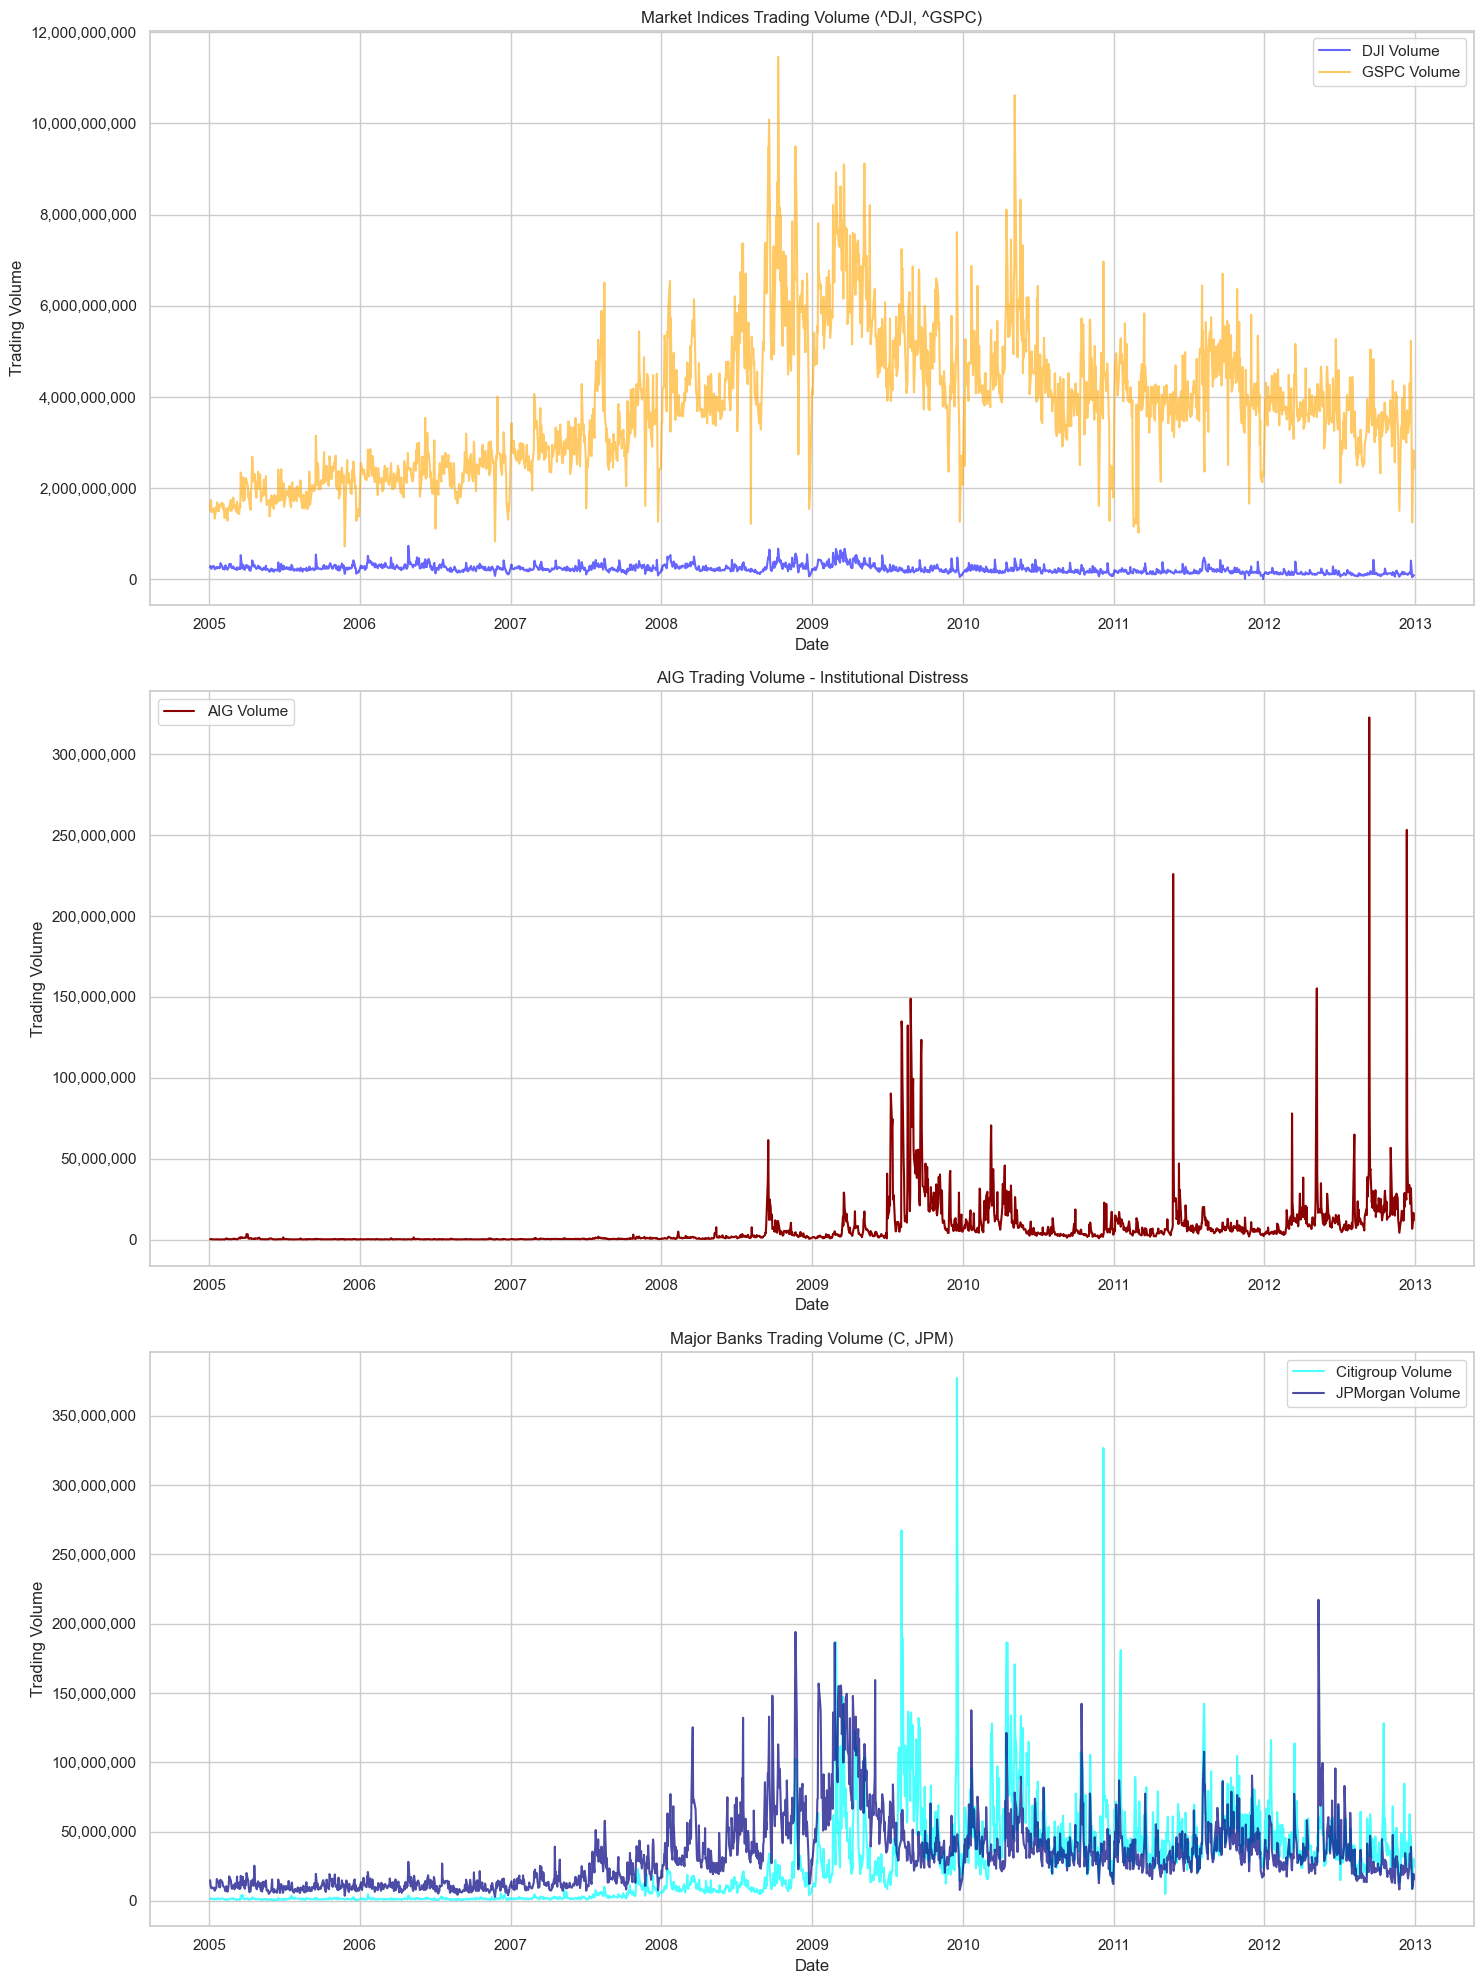

In [9]:
def load_volume_data(filepath):
    # Stock/Index CSVs have 3 header rows.
    # Date is the first column, Volume is the sixth column.
    df = pd.read_csv(filepath, skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
    return df['Volume']
# 1. Load volume data for all assets
dji_vol = load_volume_data("../data/^DJI.csv")
gspc_vol = load_volume_data("../data/^GSPC.csv")
vix_vol = load_volume_data("../data/^VIX.csv")
aig_vol = load_volume_data("../data/AIG.csv")
c_vol = load_volume_data("../data/C.csv")
jpm_vol = load_volume_data("../data/JPM.csv")
# 2. Create multi-panel plot for volume analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
# Panel 1: Market Indices Volume
axes[0].plot(dji_vol, label='DJI Volume', color='blue', alpha=0.6)
axes[0].plot(gspc_vol, label='GSPC Volume', color='orange', alpha=0.6)
axes[0].set_ylabel('Trading Volume')
axes[0].set_title('Market Indices Trading Volume (^DJI, ^GSPC)')
axes[0].legend()
# Panel 2: AIG Volume (Separate to highlight scale)
axes[1].plot(aig_vol, label='AIG Volume', color='darkred')
axes[1].set_ylabel('Trading Volume')
axes[1].set_title('AIG Trading Volume - Institutional Distress')
axes[1].legend()
# Panel 3: Citigroup and JPMorgan Volume
axes[2].plot(c_vol, label='Citigroup Volume', color='cyan', alpha=0.7)
axes[2].plot(jpm_vol, label='JPMorgan Volume', color='navy', alpha=0.7)
axes[2].set_ylabel('Trading Volume')
axes[2].set_title('Major Banks Trading Volume (C, JPM)')
axes[2].legend()
# Formatting: Ensure every plot has an x-axis and readable labels
for ax in axes:
    ax.set_xlabel('Date')
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

# Volatility Analysis

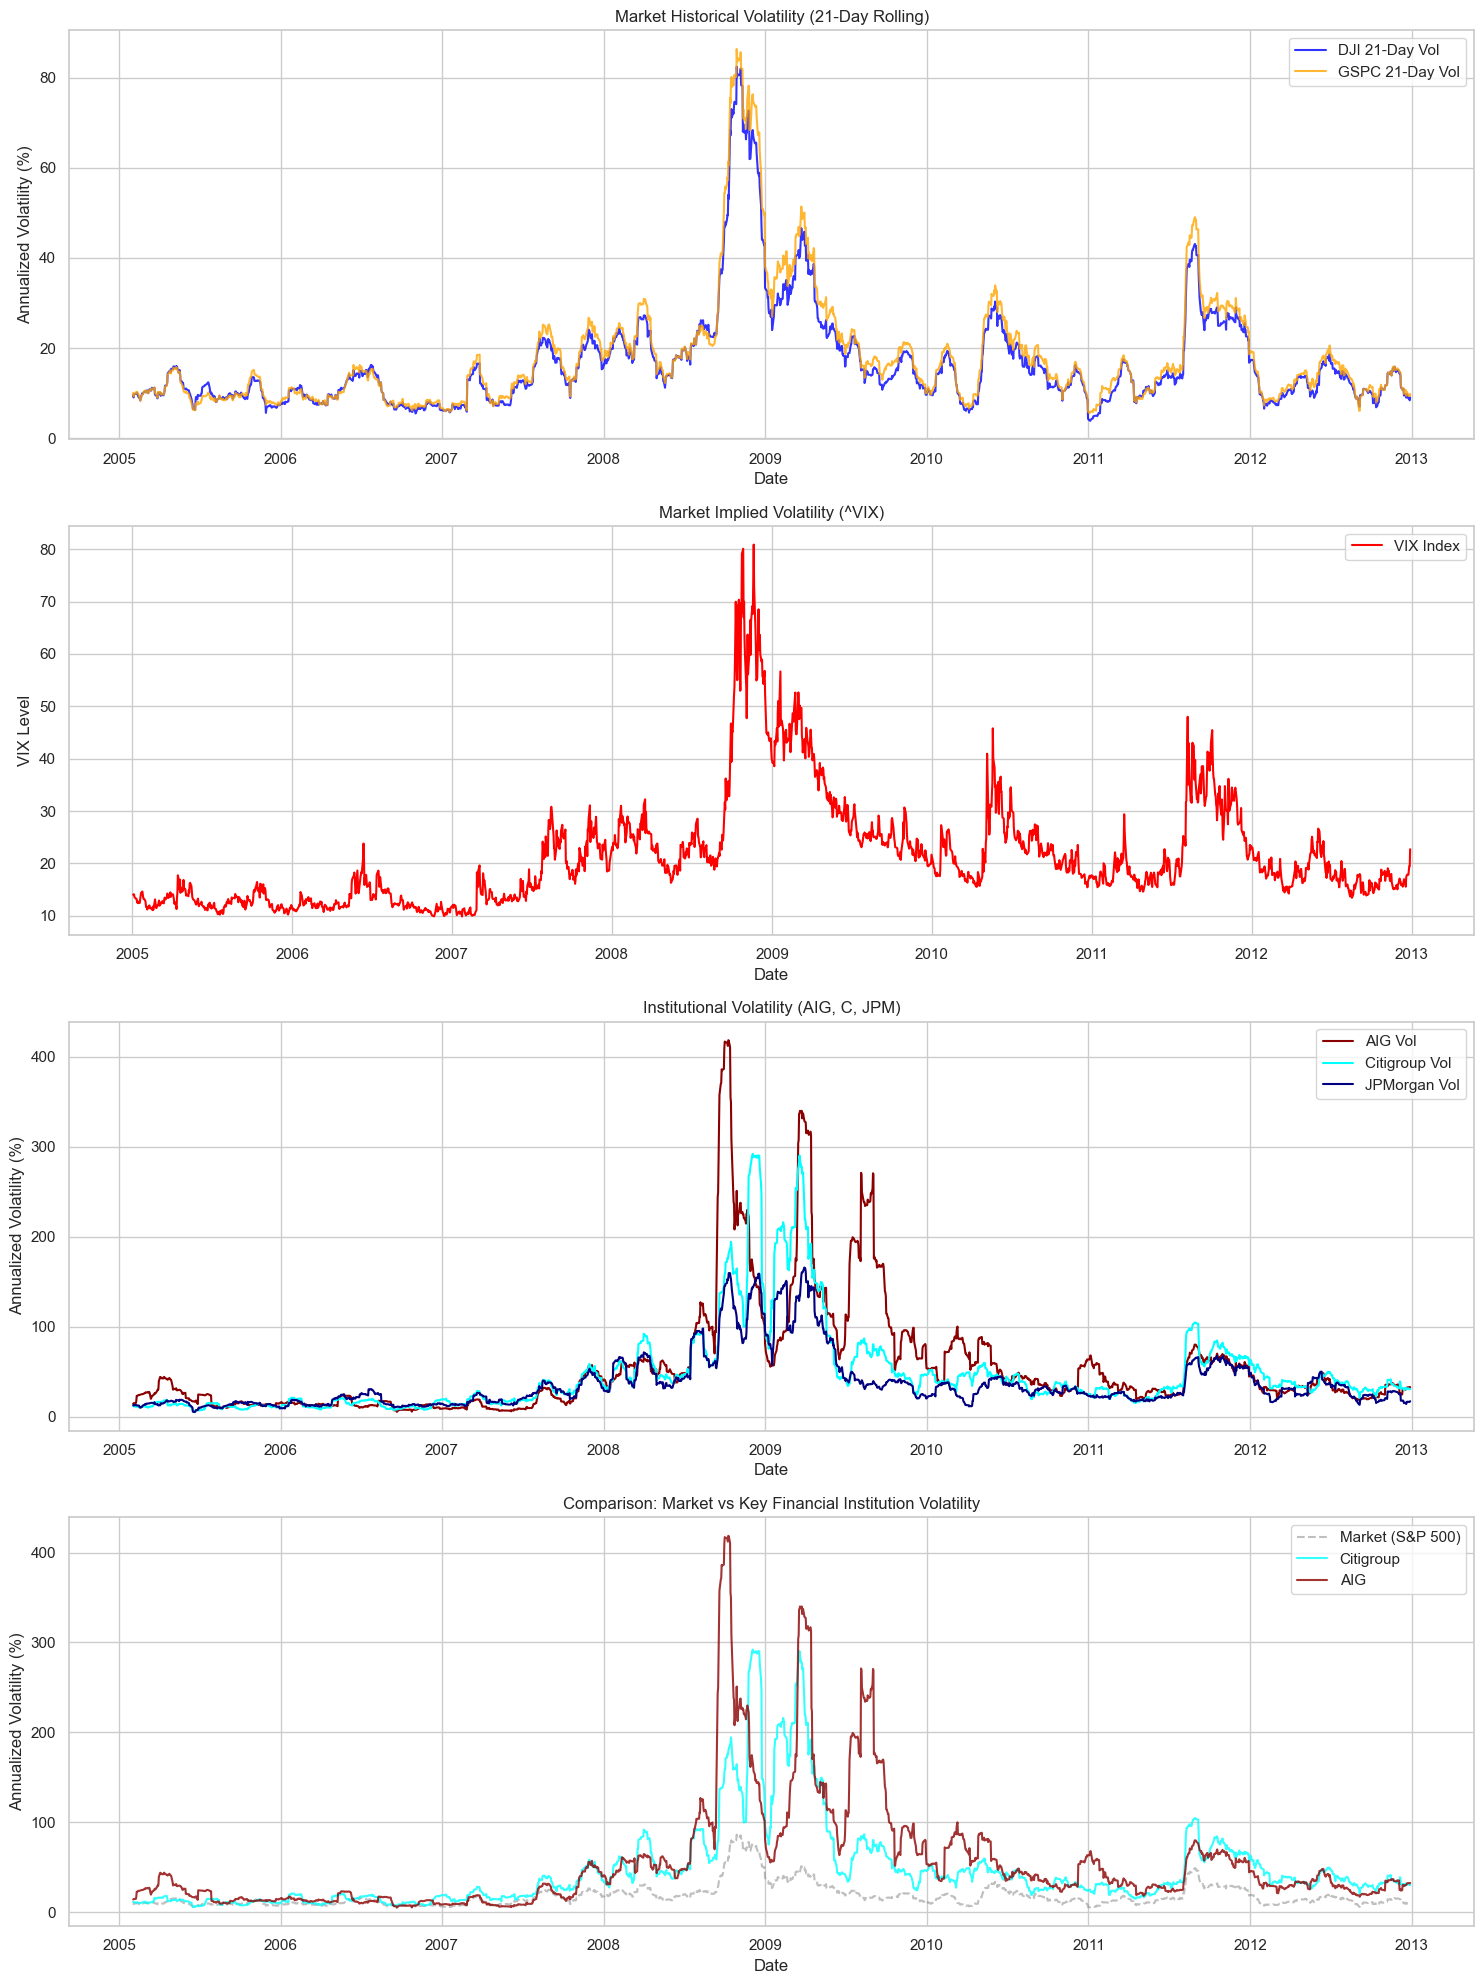

In [12]:
def load_and_calc_vol(filepath, window=21):
    # Stock/Index CSVs have 3 header rows. Skip them and set names.
    df = pd.read_csv(filepath, skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    # Ensure Close is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    
    # Calculate daily percentage returns
    df['Returns'] = df['Close'].pct_change()
    
    # Calculate rolling standard deviation (volatility) and annualize it
    # Annualization factor: sqrt(252 trading days)
    # Shown as a percentage (%)
    df['Volatility'] = df['Returns'].rolling(window=window).std() * np.sqrt(252) * 100
    
    return df['Volatility']
# 1. Calculate volatility for all major assets
dji_vol = load_and_calc_vol("../data/^DJI.csv")
gspc_vol = load_and_calc_vol("../data/^GSPC.csv")
aig_vol = load_and_calc_vol("../data/AIG.csv")
c_vol = load_and_calc_vol("../data/C.csv")
jpm_vol = load_and_calc_vol("../data/JPM.csv")
# Load VIX separately for comparison (already a volatility measure)
vix = pd.read_csv("../data/^VIX.csv", skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])
vix['Date'] = pd.to_datetime(vix['Date'])
vix = vix.set_index('Date')
vix['Close'] = pd.to_numeric(vix['Close'], errors='coerce')
# 2. Create multi-panel plot for volatility comparison
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
# Panel 1: Market Indices Volatility
axes[0].plot(dji_vol, label='DJI 21-Day Vol', color='blue', alpha=0.8)
axes[0].plot(gspc_vol, label='GSPC 21-Day Vol', color='orange', alpha=0.8)
axes[0].set_ylabel('Annualized Volatility (%)')
axes[0].set_title('Market Historical Volatility (21-Day Rolling)')
axes[0].legend()
# Panel 2: Market Expectation (Implied Volatility Index)
axes[1].plot(vix['Close'], label='VIX Index', color='red')
axes[1].set_ylabel('VIX Level')
axes[1].set_title('Market Implied Volatility (^VIX)')
axes[1].legend()
# Panel 3: Financial Institutions Volatility (Individual Stocks)
axes[2].plot(aig_vol, label='AIG Vol', color='darkred')
axes[2].plot(c_vol, label='Citigroup Vol', color='cyan')
axes[2].plot(jpm_vol, label='JPMorgan Vol', color='navy')
axes[2].set_ylabel('Annualized Volatility (%)')
axes[2].set_title('Institutional Volatility (AIG, C, JPM)')
axes[2].legend()
# Panel 4: Comparative Overlay (Market vs Banks)
axes[3].plot(gspc_vol, label='Market (S&P 500)', color='gray', alpha=0.5, linestyle='--')
axes[3].plot(c_vol, label='Citigroup', color='cyan', alpha=0.8)
axes[3].plot(aig_vol, label='AIG', color='darkred', alpha=0.8)
axes[3].set_ylabel('Annualized Volatility (%)')
axes[3].set_title('Comparison: Market vs Key Financial Institution Volatility')
axes[3].legend()
# Formatting: Ensure x-axes are visible and labeled
for ax in axes:
    ax.set_xlabel('Date')
plt.tight_layout()
plt.show()

# JPM vs C (Daily Volatility)

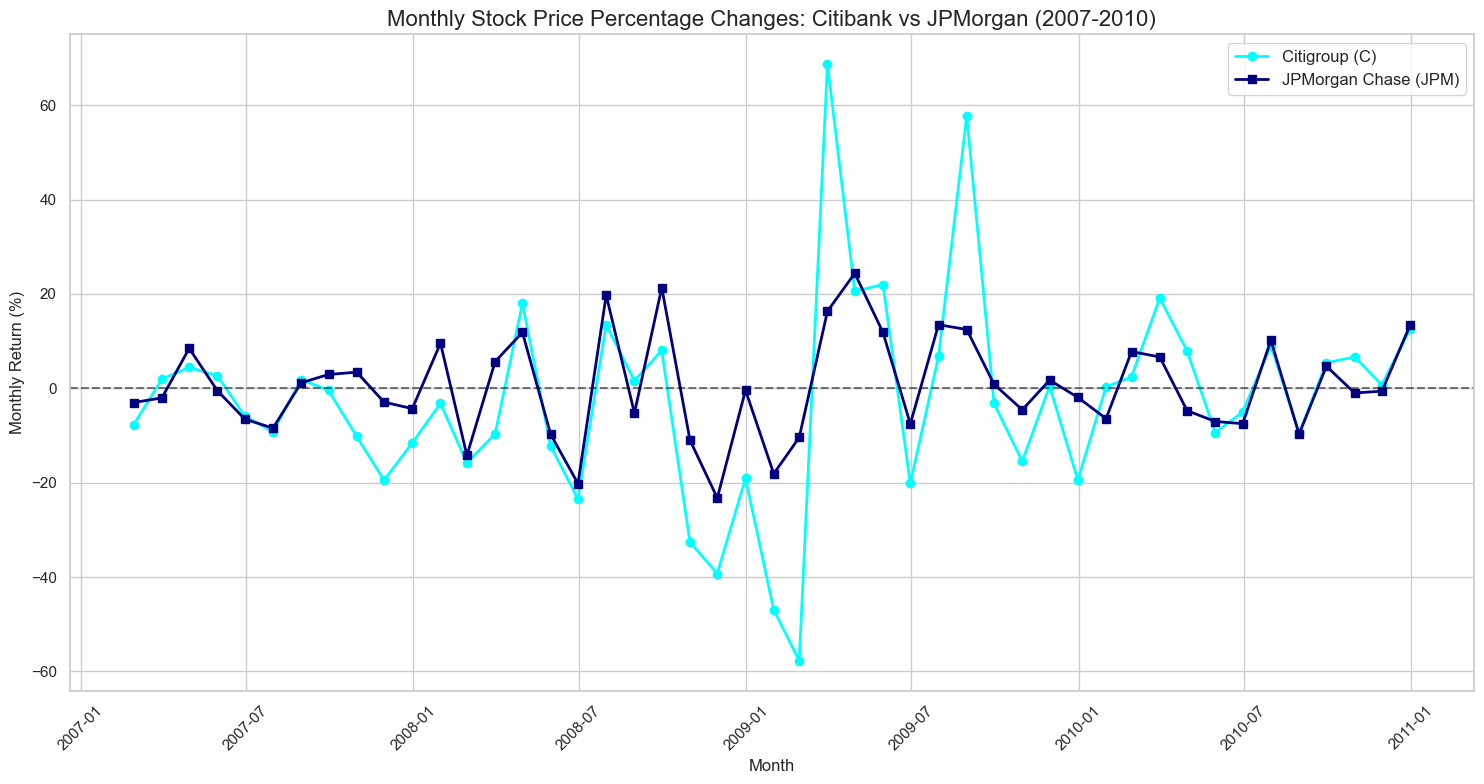

Citi Worst Month: -57.75% in February 2009
JPM Worst Month: -23.25% in November 2008


In [19]:
def get_monthly_returns(filepath):
    # Load data (Stock CSVs have 3 header rows)
    df = pd.read_csv(filepath, skiprows=3, names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    
    # Filter for the crisis period (2007-2010)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df_filtered = df.loc['2007-01-01':'2010-12-31'].copy()
    
    # Aggregate to monthly prices (using the last trading day's close for each month)
    monthly_prices = df_filtered['Close'].resample('ME').last()
    
    # Calculate month-over-month percentage change
    return monthly_prices.pct_change() * 100
# 1. Calculate monthly returns for Citibank and JPMorgan
c_returns = get_monthly_returns("../data/C.csv")
jpm_returns = get_monthly_returns("../data/JPM.csv")
# 2. Plot the comparison
plt.figure(figsize=(15, 8))
plt.plot(c_returns, label='Citigroup (C)', marker='o', color='cyan', linewidth=2)
plt.plot(jpm_returns, label='JPMorgan Chase (JPM)', marker='s', color='navy', linewidth=2)
# Add a dashed line at 0% to represent no change
plt.axhline(0, color='black', linewidth=1.5, linestyle='--', alpha=0.5)
plt.title('Monthly Stock Price Percentage Changes: Citibank vs JPMorgan (2007-2010)', fontsize=16)
plt.ylabel('Monthly Return (%)', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend(fontsize=12)
# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 3. Print summaries for context
print(f"Citi Worst Month: {c_returns.min():.2f}% in {c_returns.idxmin().strftime('%B %Y')}")
print(f"JPM Worst Month: {jpm_returns.min():.2f}% in {jpm_returns.idxmin().strftime('%B %Y')}")